# Regression and Other Stories: Influence

Plot influence of individual points in a fitted regression. See Chapter 8 in Regression and Other Stories.

-----

## Load Packages

In [ ]:
using GLM, Distributions, Random, DataFrames, StatsPlots, Plots

## Fake data

In [2]:
x = Array(2:1:12)
n = length(x)
a = 1
b = 2
sigma = 5
y = rand.(Normal.(a .+ b*x, sigma))
df = DataFrame(Dict(
        "y"=>y,
        "x"=>x
        )) 
least_squares_fit = lm(@formula(y ~ x), df)
a_hat = coef(least_squares_fit)[1]
b_hat = coef(least_squares_fit)[2];

## Plot histogram of the data

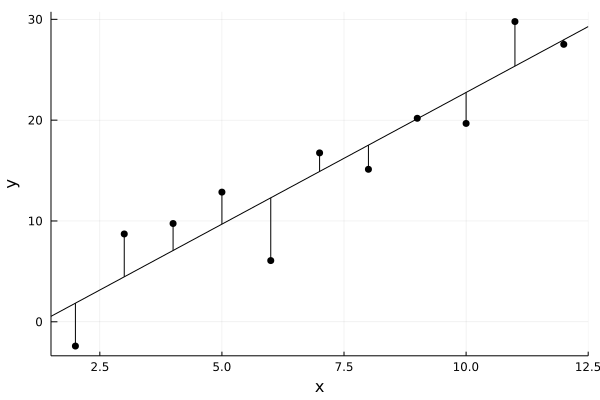

In [3]:
p=scatter(
    x,y,
    color=:black,
    legend=false,
    xlim=(1.5,12.5),
    xlabel="x",
    ylabel="y"
)
plot!(
    1.5:1:12.5,
    x-> a_hat + b_hat * x,
    color=:black
)
for i in 1:n
    plot!(
        [x[i],x[i]], 
        [y[i], a_hat + b_hat * x[i]],
        color=:black
    )
end
display(p)